<h1>Regresión Lineal Ordinaria (LSS)</h1>

<h2>Construcción del dataframe</h2>

<p>a) Se hace uso de la cuarta línea, porque los datos eliminados son inutiles para realizar la regresión (no son númericos o son números de registros) </p>

In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<p>b) Descripción: 18 caracteristicas, 5 float, 13 int. </p>

In [27]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<p>c) Normalización y trasformación: Importancia de hacer esto</p>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])

<p>d) Regresión lineal de mínimos cuadrados básica y explicación: se hace porque hace falta l intercepto dentro del vector X, (B0) </p>

In [29]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))#Explicar esto
y = df_scaled['price']
#Mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

<p>e) Z-Score </p>


In [62]:
#print(linreg.coef_) #estos son los b_j
coefs = linreg.coef_
suma = 0
valores = Xtrain.values
ygorro = linreg.predict(Xtrain)
for i in range(len(ytrain)):
    sig = ytrain[i] - ygorro[i]
    suma+= sig*sig
Sigma = np.sqrt(suma/(len(ytrain)-1))
print("desviacion estandar:"+ str(Sigma))
XtX = np.dot(np.transpose(Xtrain),Xtrain)#X tranpuesta punto X
XtX_inv = np.linalg.inv(XtX)#Invertida de lo anterior
Zscore = []
n = limit
for i in range(len(coefs)):
    score = coefs[i]/(Sigma*np.sqrt(XtX_inv[i][i]))
    Zscore.append(score)
Zscore2=map(abs,Zscore)
sum2 =sum(Zscore2)
caracteristicas=['bedrooms', 'bathrooms','sqft_living','sqft_lot',         
                 'floors','waterfront','view','condition','grade', 
                 'sqft_above','sqft_basement','yr_built','yr_renovated',
                 'lat','long','sqft_living15','sqft_lot15']
#for i in range(len(caracteristicas)):
#    print(caracteristicas[i]+': '+str((Zscore2[i])/sum2))
print('<table style="width:100%">'+
      "<tr>"+
      "<th>Atributo</th>"+
      "<th>Bj</th>"+
      "<th>Z-score</th>"+
      "<th>Cota Inferior</th>"+
      "<th>Cota Superior</th>"+
      "<th>Aceptado?</th>"+
      "</tr>")
    
for i in range(len(caracteristicas)):
    i = int(i)
    #cota_inferiorZ = coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma
    cota_inferiorScore = coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma
    #cota_superiorZ = coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma
    cota_superiorScore = coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma
    
    print("<tr>"+
          "<td>"+str(caracteristicas[i])+"</td>"+
          "<td>"+str(coefs[i])+"</td>"+
          "<td>"+str(Zscore[i])+"</td>"+
          "<td>"+str(cota_inferiorScore)+"</td>"+
          "<td>"+str(cota_superiorScore)+"</td>")
#    print("Z=0.95")
#    print(str(coefs[i])+': ['+str(coefs[i]-1.645*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+1.645*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    #if coefs[i]> cota_inferiorZ and coefs[i]< cota_superiorZ:
        
    #else:
    #    print(caracteristicas[i]+" false")
        
    #print("ZScore")
    #print(str(coefs[i])+': ['+str(coefs[i]-Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma) +', '+str(coefs[i]+Zscore2[i]*np.sqrt(XtX_inv[i][i])*Sigma)+']')
    if coefs[i]> cota_inferiorScore and coefs[i]<cota_superiorScore:
        print("<td>true</td>"+"</tr>")
    else:
        print("<td>false</td>"+"</tr>")
        
print("</table>")

desviacion estandar:13.5620672856
<table style="width:100%"><tr><th>Atributo</th><th>Bj</th><th>Z-score</th><th>Cota Inferior</th><th>Cota Superior</th><th>Aceptado?</th></tr>
<tr><td>bedrooms</td><td>-1.25732228619</td><td>-8.64508687658</td><td>-2.51464457239</td><td>0.0</td>
<td>true</td></tr>
<tr><td>bathrooms</td><td>-0.353927103502</td><td>-1.73714569876</td><td>-0.707854207005</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_living</td><td>1.22482368601</td><td>1.7031397898e-07</td><td>-2.22044604925e-16</td><td>2.44964737201</td>
<td>true</td></tr>
<tr><td>sqft_lot</td><td>0.412448057247</td><td>2.65009565843</td><td>-5.55111512313e-17</td><td>0.824896114495</td>
<td>true</td></tr>
<tr><td>floors</td><td>-2.31468580595</td><td>-14.1882142727</td><td>-4.6293716119</td><td>-4.4408920985e-16</td>
<td>true</td></tr>
<tr><td>waterfront</td><td>0.138316045851</td><td>1.14316865699</td><td>2.77555756156e-17</td><td>0.276632091702</td>
<td>true</td></tr>
<tr><td>view</td><td>0.50518301

<table style="width:100%"><tr><th>Atributo</th><th>Bj</th><th>Zscore</th><th>Cota Inferior</th><th>Cota Superior</th><th>Aceptado?</th></tr>
<tr><td>bedrooms</td><td>-1.25732228619</td><td>-8.64508687658</td><td>-2.51464457239</td><td>0.0</td>
<td>true</td></tr>
<tr><td>bathrooms</td><td>-0.353927103502</td><td>-1.73714569876</td><td>-0.707854207005</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_living</td><td>1.22482368601</td><td>1.7031397898e-07</td><td>-2.22044604925e-16</td><td>2.44964737201</td>
<td>true</td></tr>
<tr><td>sqft_lot</td><td>0.412448057247</td><td>2.65009565843</td><td>-5.55111512313e-17</td><td>0.824896114495</td>
<td>true</td></tr>
<tr><td>floors</td><td>-2.31468580595</td><td>-14.1882142727</td><td>-4.6293716119</td><td>-4.4408920985e-16</td>
<td>true</td></tr>
<tr><td>waterfront</td><td>0.138316045851</td><td>1.14316865699</td><td>2.77555756156e-17</td><td>0.276632091702</td>
<td>true</td></tr>
<tr><td>view</td><td>0.505183013784</td><td>3.91244979738</td><td>0.0</td><td>1.01036602757</td>
<td>true</td></tr>
<tr><td>condition</td><td>-0.310637760314</td><td>-2.64055956313</td><td>-0.621275520627</td><td>5.55111512313e-17</td>
<td>true</td></tr>
<tr><td>grade</td><td>1.53488066468</td><td>7.42518535539</td><td>-2.22044604925e-16</td><td>3.06976132936</td>
<td>true</td></tr>
<tr><td>sqft_above</td><td>1.53458594157</td><td>2.36668847291e-07</td><td>0.0</td><td>3.06917188315</td>
<td>true</td></tr>
<tr><td>sqft_basement</td><td>-0.329545486494</td><td>-9.50947149726e-08</td><td>-0.659090972989</td><td>0.0</td>
<td>true</td></tr>
<tr><td>yr_built</td><td>-3.29095084709</td><td>-19.0573944448</td><td>-6.58190169418</td><td>4.4408920985e-16</td>
<td>true</td></tr>
<tr><td>yr_renovated</td><td>0.271344520675</td><td>2.36769264724</td><td>0.0</td><td>0.542689041349</td>
<td>true</td></tr>
<tr><td>lat</td><td>-2.93730293977</td><td>-25.3555934789</td><td>-5.87460587954</td><td>-4.4408920985e-16</td>
<td>true</td></tr>
<tr><td>long</td><td>-1.07549636898</td><td>-7.86241546147</td><td>-2.15099273796</td><td>0.0</td>
<td>true</td></tr>
<tr><td>sqft_living15</td><td>1.59311711786</td><td>8.18927631562</td><td>2.22044604925e-16</td><td>3.18623423571</td>
<td>true</td></tr>
<tr><td>sqft_lot15</td><td>0.171036492061</td><td>1.07272716682</td><td>0.0</td><td>0.342072984123</td>
<td>true</td></tr>
</table>

<p>f) Corrección: Se ve claramente que el ultimo valor propio es en extremo cercano a 0 en comparación a los otros, lo que genera problemas, pues la matriz está mal condicionada. Esta es la razon pro la que los Z-score varían tanto.  </p>


In [65]:
import numpy.linalg as linalg
eigen = linalg.eigvals(XtX)
print(eigen)

[  7.59427443e+04   3.11729058e+04   2.71289913e+04   1.97362536e+04
   1.71931437e+04   1.51126231e+04   1.33398848e+04   1.12024967e+04
   9.87883821e+03   8.19017131e+03   7.66022547e+03   5.00730224e+03
   4.40475848e+03   2.86178702e+03   3.61036909e+03   3.29852753e+03
   2.57253073e-12]


<p>g) Cross-Validation </p>

In [31]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print("Error real sin cross: "+str(mse_test))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
print("############################")
from sklearn.model_selection import KFold

### Con K=10 ###############
kf = KFold(n_splits=10)
mse_cv = 0
mse_real10 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    
    yhat_test10 = linreg.predict(Xtest)
    mse_test10 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real10+=mse_test10

mse_real10 /= 10
mse_cv = mse_cv / 10
print("Error real con K=10: "+str(mse_real10))
print("Error validacion con K=10: "+str(mse_cv))
print("############################")
### Con K=5 ################
kf = KFold(n_splits=5)
mse_cv = 0
mse_real5 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
    yhat_test5 = linreg.predict(Xtest)
    mse_test5 = np.mean(np.power(yhat_test10 - ytest, 2))
    mse_real5+=mse_test5

mse_real5 /= 5
print("Error real con K=5: "+str(mse_real5))
mse_cv = mse_cv / 5
print("Error validacion con K=5: "+str(mse_cv))

Error real sin cross: 0.0654124075861
############################
Error real con K=10: 0.0653438332975
Error validacion con K=10: 0.0646905656615
############################
Error real con K=5: 0.065287831397
Error validacion con K=5: 0.0646902919559


h) residuos de entrenamiento normales?

In [32]:
linreg.fit(Xtrain,ytrain)
ygorro = linreg.predict(Xtrain)
errores= np.array(ygorro - ytrain)
print(errores[:5])

[ 0.26467037  0.12518303  0.84181421 -0.37402366 -0.20138985]


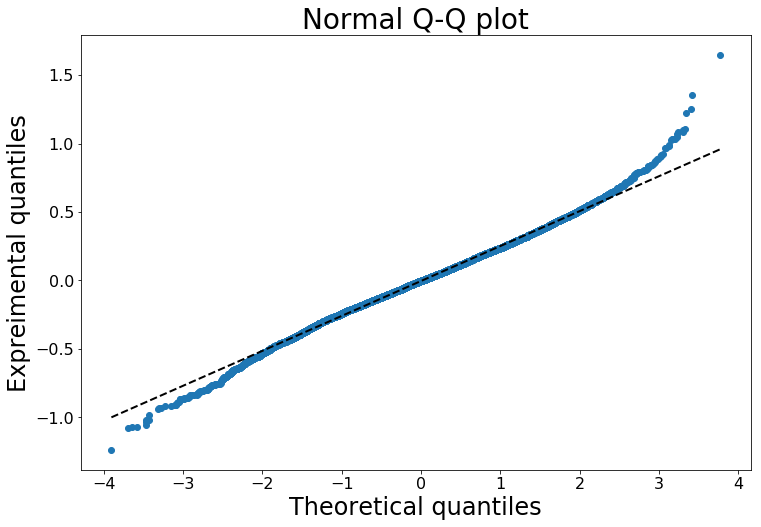

In [33]:
import numpy.random as random
import matplotlib.pyplot as plt

data=errores

data.sort()
norm=random.normal(0,1,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

<h2>Selección de atributos</h2>

In [37]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = map(abs,predictions_train - y)
            #Residuo Laplaciano // de valor absoluto
            laplace_candidate = np.mean(residuals_train)
            score_candidates.append((laplace_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mle = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
fss(Xm,ym,caracteristicas)

selected = grade ...
totalvars=2, mle = 0.302697
selected = lat ...
totalvars=3, mle = 0.249518
selected = sqft_living ...
totalvars=4, mle = 0.225651
selected = yr_built ...
totalvars=5, mle = 0.211753
selected = view ...
totalvars=6, mle = 0.206941
selected = bathrooms ...
totalvars=7, mle = 0.204301
selected = sqft_living15 ...
totalvars=8, mle = 0.202069
selected = condition ...
totalvars=9, mle = 0.200426
selected = floors ...
totalvars=10, mle = 0.198749
selected = waterfront ...
totalvars=11, mle = 0.197509
selected = sqft_lot ...
totalvars=12, mle = 0.197028
selected = bedrooms ...
totalvars=13, mle = 0.196811
selected = yr_renovated ...
totalvars=14, mle = 0.196634
selected = sqft_basement ...
totalvars=15, mle = 0.196472
selected = sqft_lot15 ...
totalvars=16, mle = 0.196463
selected = sqft_above ...
totalvars=17, mle = 0.196425
selected = long ...
totalvars=18, mle = 0.196594


[17L, 8, 13, 2, 11, 6, 1, 15, 7, 4, 5, 3, 0, 12, 10, 16, 9, 14]

<h2>Regularización</h2>

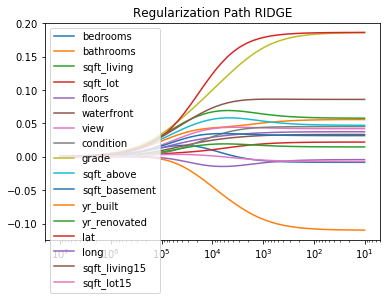

In [43]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE') 
plt.axis('tight')
plt.legend(loc=2)
plt.show()


<p>con lasso</p>

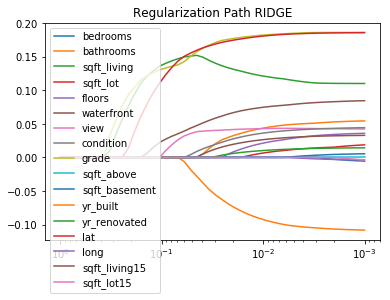

In [44]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE') 
plt.axis('tight')
plt.legend(loc=2)
plt.show()

<p>Escogemos lasso, porque elimina los atributos que hacen ruido en el modelo y baja la dimencionalidad, en vez de reducir sus efectos como los hace Ridge</p>

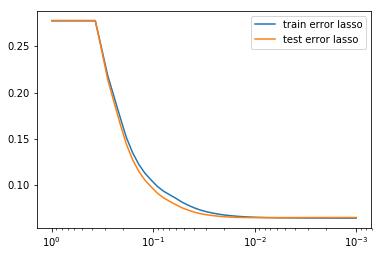

In [48]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


In [49]:
##E con Lasso
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(0,-3,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)


BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0

In [50]:
##E con Ridge
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                    for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=10000000.000000, MSE(CV)=0.275499
BEST PARAMETER=7543120.063355, MSE(CV)=0.274855
BEST PARAMETER=5689866.029018, MSE(CV)=0.274008
BEST PARAMETER=4291934.260129, MSE(CV)=0.272894
BEST PARAMETER=3237457.542818, MSE(CV)=0.271436
BEST PARAMETER=2442053.094549, MSE(CV)=0.269531
BEST PARAMETER=1842069.969327, MSE(CV)=0.267057
BEST PARAMETER=1389495.494373, MSE(CV)=0.263865
BEST PARAMETER=1048113.134155, MSE(CV)=0.259777
BEST PARAMETER=790604.321091, MSE(CV)=0.254598
BEST PARAMETER=596362.331659, MSE(CV)=0.248125
BEST PARAMETER=449843.266897, MSE(CV)=0.240168
BEST PARAMETER=339322.177190, MSE(CV)=0.230586
BEST PARAMETER=255954.792270, MSE(CV)=0.219331
BEST PARAMETER=193069.772888, MSE(CV)=0.206492
BEST PARAMETER=145634.847750, MSE(CV)=0.192326
BEST PARAMETER=109854.114199, MSE(CV)=0.177258
BEST PARAMETER=82864.277285, MSE(CV)=0.161835
BEST PARAMETER=62505.519253, MSE(CV)=0.146650
BEST PARAMETER=47148.663635, MSE(CV)=0.132252
BEST PARAMETER=35564.803062, MSE(CV)=0.119077
BEST PA

<h2>Drift</h2>

In [51]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

In [52]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)


In [53]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain_A, ytrain_A)
yhat_val_A = linreg.predict(Xval_A)
mse = np.mean(np.power(yhat_val_A - yval_A, 2))
print("mse: "+str(mse))    

mse: 174.484191836


In [54]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain_B, ytrain_B)
yhat_val_B = linreg.predict(Xval_B)
mse = np.mean(np.power(yhat_val_B - yval_B, 2))
print("mse: "+str(mse)) 

mse: 125.825255554


<p>Escogeriamos B, porque permite trabajar mejor con el modelo debido a que la RL pasa por la distribución de puntos que estáb uniformemente distribuidos</p>

<h2>Detectar enfermedades cardiacas</h2>

In [80]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 
             'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null float64
chest_pain    270 non-null float64
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null float64
electro       270 non-null float64
max_heart     270 non-null float64
angina        270 non-null float64
oldpeak       270 non-null float64
slope         270 non-null float64
vessel        270 non-null float64
thal          270 non-null float64
normal        270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


mse: 464.659244023


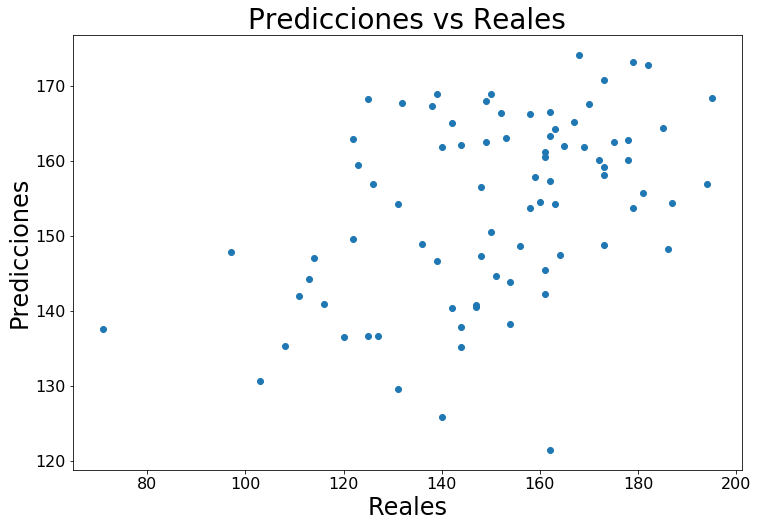

In [99]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
y = df[['max_heart','normal']]

X = df[['age','sex','chest_pain','blood_p','serum','blood_s','electro','angina','oldpeak','slope','vessel','thal']]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
ytrain = ytrain.as_matrix()
ytest = ytest.as_matrix()
ytrain_normal = ytrain[:,1]
ytrain_heart = ytrain[:,0]
ytest_normal = ytest[:,1]
ytest_heart = ytest[:,0]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain_heart)
predictions = linreg.predict(Xtest)
mse = np.mean(np.power(predictions - ytest_heart,2))
print("mse: "+str(mse))

#para visualizar
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(ytest_heart,predictions)
plt.title("Predicciones vs Reales", size=28)
plt.xlabel("Reales", size=24)
plt.ylabel("Predicciones", size=24)
plt.tick_params(labelsize=16)
plt.show()

In [117]:


media_heart = np.median(ytrain_heart)
predictions_normal=[]
for pred in predictions:
    if(pred>media_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite->mediana: "+str(accuracy_score(ytest_normal,predictions_normal))) 
##########por Region de promedio mas k desviacion estandar##############################################
media_heart = np.mean(ytrain_heart)
desviacion_heart = np.std(ytrain_heart)
k=1 #tamaño del intervalo
cota_inferior_heart = media_heart - k*desviacion_heart
cota_superior_heart = media_heart - k*desviacion_heart

predictions_normal=[]
for pred in predictions:
    if(pred>cota_inferior_heart and pred<cota_superior_heart):
        predictions_normal.append(1)
    else:
        predictions_normal.append(2)

print("Score de limite en region: "+str(accuracy_score(ytest_normal,predictions_normal)))        
########################################################################################################        
        
##########Esto sirve para comparar y decir que la regresion lineal o escojer a mano es malo#############
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(ytrain_heart.reshape((len(ytrain_normal),1)),ytrain_normal)
n = len(predictions)
predictions_normal = model.predict(predictions.reshape((n,1)))
from sklearn.metrics import accuracy_score
print("Score de LogisticRegression: "+str(accuracy_score(ytest_normal,predictions_normal)))
########################################################################################################

"""
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(ytrain_normal,ytrain_heart)
plt.title("heart max contra normal", size=28)
plt.xlabel("normal", size=24)
plt.ylabel("heart max", size=24)
plt.tick_params(labelsize=16)
plt.show()
"""

Score de limite->mediana: 0.716049382716
Score de limite en region: 0.395061728395
Score de LogisticRegression: 0.703703703704


'\nplt.figure(figsize=(12,8),facecolor=\'1.0\') \nplt.scatter(ytrain_normal,ytrain_heart)\nplt.title("heart max contra normal", size=28)\nplt.xlabel("normal", size=24)\nplt.ylabel("heart max", size=24)\nplt.tick_params(labelsize=16)\nplt.show()\n'

<p>si se ocupa  sano mayor a la media saca 0,74; si ocupa sano mayor a la mediana saca 0,71; con un rango estadistico saca 0,39; con regresion logistica saca 0,70</p>